# Forecasting 

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

#### Data - Airlines_data

## Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as tsa_plots
from pandas.plotting import lag_plot

from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
Airlines_data = pd.read_excel('C:\\ExcelR\\Assignments\\Forecasting\\Airlines+Data.xlsx')
Airlines_data.head(8)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148


## Data Understanding

In [3]:
Airlines_data.shape

(96, 2)

In [4]:
Airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
Airlines_data.set_index('Month', inplace = True)
Airlines_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


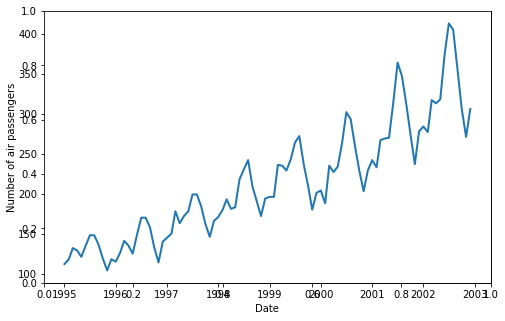

In [6]:
plt.figure(figsize = (8,5))

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()

plt.plot(Airlines_data['Passengers'], linewidth = 2)

plt.show()

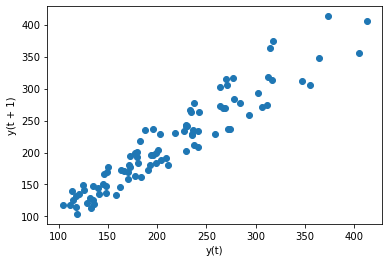

In [7]:
ax = plt.axes()

lag_plot(Airlines_data['Passengers'])

plt.show()

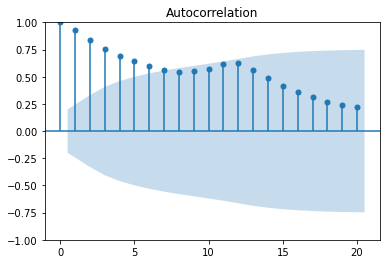

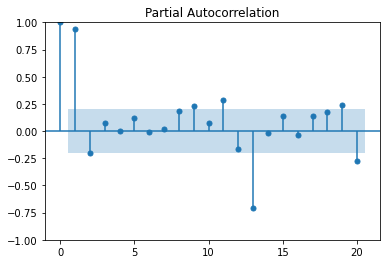

In [8]:
tsa_plots.plot_acf(Airlines_data['Passengers'],lags = 20)

tsa_plots.plot_pacf(Airlines_data['Passengers'],lags = 20)

plt.show()

## Train Test Split

In [9]:
Train = Airlines_data.head(90)
Test = Airlines_data.tail(10)

In [10]:
Test

,Passengers
Month,
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271


## Plotting the Moving Average

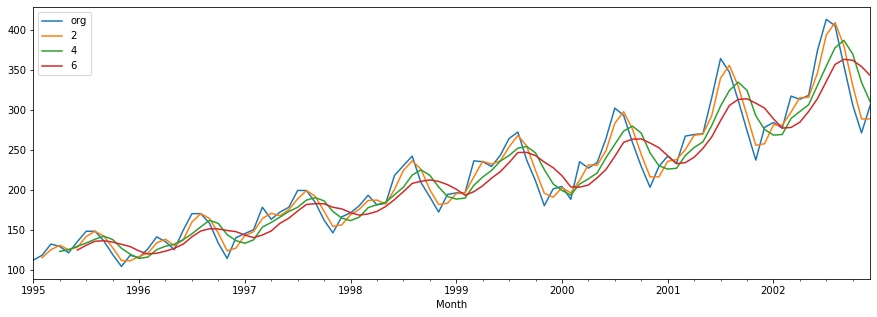

In [11]:
plt.figure(figsize = (15,5))
Airlines_data['Passengers'].plot(label = "org")

for i in range(2,8,2):
    Airlines_data['Passengers'].rolling(i).mean().plot(label = str(i))
    
plt.legend(loc = 'best')
plt.show()

## Time series decomposition plot 

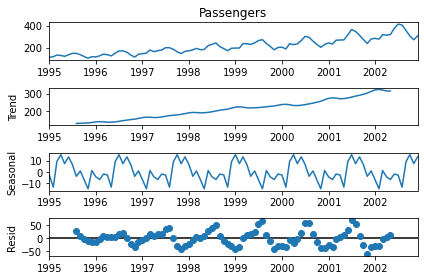

In [12]:
ts_decompose = seasonal_decompose(Airlines_data.Passengers,period = 15)
ts_decompose.plot()
plt.show()

## Evaluation Metric RMSE

In [13]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### 1. Simple Exponential Method 

In [14]:
simple_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_y_sem = simple_model.predict(start = Test.index[0],end = Test.index[-1])

In [15]:
SEM=RMSE(Test.Passengers, pred_y_sem)
print('RMSE Value of Simple Exponential :',RMSE(Test.Passengers, pred_y_sem))

RMSE Value of Simple Exponential : 52.41850787734728


### 2. Holt method 

In [16]:
holt_model = Holt(Train["Passengers"]).fit()
pred_y_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])

In [17]:
HM=RMSE(Test.Passengers, pred_y_holt)
print('RMSE Value of Holt :',RMSE(Test.Passengers, pred_y_holt))

RMSE Value of Holt : 58.96241538825408


### 3 Holts winter exponential smoothing with additive seasonality and additive trend

In [18]:
holt_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

In [19]:
HWEA=RMSE(Test.Passengers, pred_holt_add_add)
print('RMSE Value of Holts add and add :',RMSE(Test.Passengers, pred_holt_add_add))

RMSE Value of Holts add and add : 60.85124032152981


### 4 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
holt_model_multi_add = ExponentialSmoothing(Train["Passengers"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])

In [21]:
HWEM=RMSE(Test.Passengers, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',RMSE(Test.Passengers, pred_holt_multi_add))

RMSE Value of Holts Multi and add : 64.12588094820774


# Model based Forecasting Methods

## Data preprocessing

In [22]:
Passenger_Data = Airlines_data.copy()
Passenger_Data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [23]:
Passenger_Data["t"] = np.arange(1,97)
Passenger_Data["t_squared"] = Passenger_Data["t"]*Passenger_Data["t"]

Passenger_Data["log_psngr"] = np.log(Passenger_Data["Passengers"])
Passenger_Data.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


## Train Test Split

In [24]:
Train = Passenger_Data.head(90)
Test = Passenger_Data.tail(10)

## Linear Model 

In [25]:
import statsmodels.formula.api as smf 

In [26]:
linear_model = smf.ols('Passengers~t',data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

LM=RMSE(Test['Passengers'], pred_linear)
print('RMSE Value of Linear :',RMSE(Test['Passengers'], pred_linear))

RMSE Value of Linear : 55.07001034672154


## Exponential Model 

In [27]:
Exp_model = smf.ols('log_psngr~t',data = Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))

EM=RMSE(Test['Passengers'], np.exp(pred_Exp))
print('RMSE Value of Exponential :',RMSE(Test['Passengers'], np.exp(pred_Exp)))

RMSE Value of Exponential : 49.15546861809392


##  Quadratic Model 

In [28]:
Quad_model= smf.ols('Passengers~t+t_squared',data = Train).fit()
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_squared"]]))

QM=RMSE(Test['Passengers'], pred_Quad)
print('RMSE Value of Quadratic :',RMSE(Test['Passengers'], pred_Quad))

RMSE Value of Quadratic : 49.78259087744372


## ARIMA model

In [29]:
series = Airlines_data.copy()
series.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## Creating a validation dataset 

In [30]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Dataset 84, Validation 12


## Creating a Base model for Evaluation

In [31]:
Arima_train = pd.read_excel('C:\\ExcelR\\Assignments\\Forecasting\\Airlines+Data.xlsx')
Arima_train =Arima_train["Passengers"]
Arima_train.head()

0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64

In [32]:
X = Arima_train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [33]:
print(train.shape)
print(test.shape)

(68,)
(28,)


## 8.3 Walk Farward Validation :

In [34]:
history = [x for x in train]
predictions = list()

In [35]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)

    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
>Predicted=278.000, Expected=284.000
>Predicted=284.000, Expected=277.000
>Predicted=277.000, Expected=317.000
>Predicted=317.000, Expected=313.000
>Predicted=313.000, Expected=318.000
>Predicted=318.000, Expected=374.000
>Predicted=374.000, Expected=413.000
>Predicted=413.000, Expected=405.000
>Predicted=405.000, Expected=355.000
>Predicted=355.000, Expected=306.000
>Predicted=306.000, Expected=271.000
>

In [36]:
#predictions
#predictions.remove(293)

In [37]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE Value : %.3f' % rmse)

RMSE Value : 32.211


In [38]:
rmse_Persistence_model = 32.211

## Evaluation

In [39]:
list = [['Simple Exponential Method',SEM], ['Holt method',HM],
          ['Holt exp smoothing add',HWEA],['Holt exp smoothing multi',HWEM],
          ['Linear Model',LM],['Exponential model',EM],['Quadratic model',QM],
          ['Persistence/ Base model', rmse_Persistence_model]]

In [40]:
df = pd.DataFrame(list, columns = ['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,52.418508
1,Holt method,58.962415
2,Holt exp smoothing add,60.851240
3,Holt exp smoothing multi,64.125881
4,Linear Model,55.070010
5,Exponential model,49.155469
6,Quadratic model,49.782591
7,Persistence/ Base model,32.211000


### Conclusions

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend has the highest value of RMSE and hence is chosen for deployment.